In [7]:
import librosa
import librosa.display
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

from IPython.display import Audio
%matplotlib inline
sns.set_style("ticks")

In [8]:
def plot_stft(sig):
    D = librosa.amplitude_to_db(np.abs(librosa.stft(sig)), ref=np.max)
    librosa.display.specshow(D, y_axis='linear');

In [9]:
def plot_mel_specgtrogram(y):
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    S_dB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_dB, x_axis='time',
                             y_axis='mel', sr=sr);



In [10]:
def plot_dft(sig, win_len=1024):
    window = np.hamming(win_len)
    sig = window * sig[:win_len]
    D = np.abs(np.fft.fft(sig))[:win_len//2]
    xs = np.arange(win_len/2) * (22050/win_len)
    plt.plot(xs, D)

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, accuracy_score

In [12]:
def extract_mfccs(y, sr):
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    return np.concatenate([
        mfccs.mean(axis=1),
        mfccs.std(axis=1)
    ])

def extract_chroma(y, sr):
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    return np.concatenate([
        chroma.mean(axis=1),
        chroma.std(axis=1)
    ])

def extract_feats(y, sr):
    chroma = extract_chroma(y, sr)
    mfccs = extract_mfccs(y, sr)
    feats = np.concatenate([chroma, mfccs])
    
    labels = []   
    for i in range(len(chroma) // 2):
        labels.append('chroma_{}_mean'.format(i))
    for i in range(len(chroma) // 2):
        labels.append('chroma_{}_std'.format(i))
    for i in range(len(mfccs) // 2):
        labels.append('mfcc_{}_mean'.format(i))
    for i in range(len(mfccs) // 2):
        labels.append('mfcc_{}_std'.format(i))
        
    return feats, labels

def feats_for_fname(fname):
    y, sr = librosa.core.load(fname)
    return extract_feats(y, sr)

def fname_generator(genre):
    #for root, dirs, files in os.walk('/media/bita/Elements/Ironhack-Final/genres'):
    for root, dirs, files in os.walk('/media/bita/Elements/Ironhack-Final/Audios/genres'):    
        for file in files:
            if file.endswith('.wav') and genre in file:
                yield os.path.join(root, file)         
                
def df_for_genre(genre):
    fnames = []
    feats = []
    for fname in fname_generator(genre):
        # print("extracting feats for {}".format(fname))
        cur_feats, labels = feats_for_fname(fname)
        fnames.append(fname)
        feats.append(cur_feats)
    df = pd.DataFrame(feats, columns=labels, index=fnames)
    df['label'] = genre
    return df

In [13]:
#data = pd.concat([df_for_genre(genre) for genre in ['pop', 'classical']])
#data = pd.concat([df_for_genre(genre) for genre in ['Meow', 'Bark']])
data = pd.concat([df_for_genre(genre) for genre in ['Cows', 'Keys']])

/home/bita/anaconda3/envs/backpack1/lib/python3.7/site-packages/librosa/core/pitch.py:146: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


In [8]:
data

chroma_0_mean  \
/media/bita/Elements/Ironhack-Final/Audios/genr...       0.484891   
/media/bita/Elements/Ironhack-Final/Audios/genr...       0.621441   
/media/bita/Elements/Ironhack-Final/Audios/genr...       0.436692   
/media/bita/Elements/Ironhack-Final/Audios/genr...       0.673854   
/media/bita/Elements/Ironhack-Final/Audios/genr...       0.557546   
...                                                           ...   
/media/bita/Elements/Ironhack-Final/Audios/genr...       0.581382   
/media/bita/Elements/Ironhack-Final/Audios/genr...       0.677024   
/media/bita/Elements/Ironhack-Final/Audios/genr...       0.558839   
/media/bita/Elements/Ironhack-Final/Audios/genr...       0.542230   
/media/bita/Elements/Ironhack-Final/Audios/genr...       0.798600   

                                                    chroma_1_mean  \
/media/bita/Elements/Ironhack-Final/Audios/genr...       0.738568   
/media/bita/Elements/Ironhack-Final/Audios/genr...       0.403597   
/media/bita/Elements/Ironhack-Final/Audios/genr...       0.605281   
/media/bita/Elements/Ironhack-Final/Audios/genr...       0.733070   
/media/bita/Elements/Ironhack-Final/Audios/genr...       0.585096   
...                                                           ...   
/media/bita/Elements/Ironhack-Final/Audios/genr...       0.620916   
/media/bita/Elements/Ironhack-Final/Audios/genr...       0.616257   
/media/bita/Elements/Ironhack-Final/Audios/genr...       0.538764   
/media/bita/Elements/Ironhack-Final/Audios/genr...       0.489791   
/media/bita/Elements/Ironhack-Final/Audios/genr...       0.784477   

                                                    chroma_2_mean  \
/media/bita/Elements/Ironhack-Final/Audios/genr...       0.828094   
/media/bita/Elements/Ironhack-Final/Audios/genr...       0.471358   
/media/bita/Elements/Ironhack-Final/Audios/genr...       0.815952   
/media/bita/Elements/Ironhack-Final/Audios/genr...       0.625286   
/media/bita/Elements/Ironhack-Final/Audios/genr...       0.568882   
...                                                           ...   
/media/bita/Elements/Ironhack-Final/Audios/genr...       0.640869   
/media/bita/Elements/Ironhack-Final/Audios/genr...       0.564342   
/media/bita/Elements/Ironhack-Final/Audios/genr...       0.611471   
/media/bita/Elements/Ironhack-Final/Audios/genr...       0.515602   
/media/bita/Elements/Ironhack-Final/Audios/genr...       0.778686   

                                                    chroma_3_mean  \
/media/bita/Elements/Ironhack-Final/Audios/genr...       0.457487   
/media/bita/Elements/Ironhack-Final/Audios/genr...       0.703348   
/media/bita/Elements/Ironhack-Final/Audios/genr...       0.419485   
/media/bita/Elements/Ironhack-Final/Audios/genr...       0.546502   
/media/bita/Elements/Ironhack-Final/Audios/genr...       0.689384   
...                                                           ...   
/media/bita/Elements/Ironhack-Final/Audios/genr...       0.671509   
/media/bita/Elements/Ironhack-Final/Audios/genr...       0.579165   
/media/bita/Elements/Ironhack-Final/Audios/genr...       0.659820   
/media/bita/Elements/Ironhack-Final/Audios/genr...       0.542760   
/media/bita/Elements/Ironhack-Final/Audios/genr...       0.775109   

                                                    chroma_4_mean  \
/media/bita/Elements/Ironhack-Final/Audios/genr...       0.328307   
/media/bita/Elements/Ironhack-Final/Audios/genr...       0.217211   
/media/bita/Elements/Ironhack-Final/Audios/genr...       0.240556   
/media/bita/Elements/Ironhack-Final/Audios/genr...       0.289300   
/media/bita/Elements/Ironhack-Final/Audios/genr...       0.492487   
...                                                           ...   
/media/bita/Elements/Ironhack-Final/Audios/genr...       0.705806   
/media/bita/Elements/Ironhack-Final/Audios/genr...       0.526369   
/media/bita/Elements/Ironhack-Final/Audios/genr...       0.654872   
/media/bita/Elements/Ironhack-Final/Audios/gen

In [9]:
y = data['label']
X = data.drop('label', axis=1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [11]:
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())

In [12]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=F

In [13]:
y_pred = pipeline.predict(X_test)

In [14]:
accuracy_score(y_test, y_pred)

0.9015151515151515

In [15]:
y_test

/media/bita/Elements/Ironhack-Final/Audios/genres/Fireworks/Fireworks.09b51c66.wav    Fireworks
/media/bita/Elements/Ironhack-Final/Audios/genres/Fireworks/Fireworks.81c569b4.wav    Fireworks
/media/bita/Elements/Ironhack-Final/Audios/genres/Fireworks/Fireworks.23b7d8f5.wav    Fireworks
/media/bita/Elements/Ironhack-Final/Audios/genres/Keys/Keys.88dbcd44.wav                   Keys
/media/bita/Elements/Ironhack-Final/Audios/genres/Fireworks/Fireworks.c8f92de1.wav    Fireworks
                                                                                        ...    
/media/bita/Elements/Ironhack-Final/Audios/genres/Fireworks/Fireworks.1c3e1a54.wav    Fireworks
/media/bita/Elements/Ironhack-Final/Audios/genres/Keys/Keys.fa67cfe3.wav                   Keys
/media/bita/Elements/Ironhack-Final/Audios/genres/Keys/Keys.7d13cc12.wav                   Keys
/media/bita/Elements/Ironhack-Final/Audios/genres/Fireworks/Fireworks.0244bb9e.wav    Fireworks
/media/bita/Elements/Ironhack-Final/Audi

In [16]:
y_pred

array(['Fireworks', 'Fireworks', 'Fireworks', 'Keys', 'Fireworks',
       'Fireworks', 'Fireworks', 'Keys', 'Keys', 'Fireworks', 'Keys',
       'Keys', 'Fireworks', 'Fireworks', 'Fireworks', 'Keys', 'Keys',
       'Fireworks', 'Keys', 'Fireworks', 'Fireworks', 'Fireworks', 'Keys',
       'Keys', 'Fireworks', 'Fireworks', 'Fireworks', 'Keys', 'Keys',
       'Fireworks', 'Fireworks', 'Fireworks', 'Fireworks', 'Keys', 'Keys',
       'Fireworks', 'Keys', 'Keys', 'Fireworks', 'Keys', 'Fireworks',
       'Keys', 'Keys', 'Fireworks', 'Fireworks', 'Keys', 'Fireworks',
       'Fireworks', 'Keys', 'Fireworks', 'Fireworks', 'Fireworks',
       'Fireworks', 'Keys', 'Fireworks', 'Fireworks', 'Fireworks',
       'Fireworks', 'Keys', 'Fireworks', 'Fireworks', 'Keys', 'Fireworks',
       'Fireworks', 'Fireworks', 'Fireworks', 'Fireworks', 'Fireworks',
       'Keys', 'Fireworks', 'Fireworks', 'Fireworks', 'Fireworks',
       'Fireworks', 'Fireworks', 'Keys', 'Keys', 'Fireworks', 'Fireworks',
       'Fi

In [17]:
y_pred != y_test


/media/bita/Elements/Ironhack-Final/Audios/genres/Fireworks/Fireworks.09b51c66.wav    False
/media/bita/Elements/Ironhack-Final/Audios/genres/Fireworks/Fireworks.81c569b4.wav    False
/media/bita/Elements/Ironhack-Final/Audios/genres/Fireworks/Fireworks.23b7d8f5.wav    False
/media/bita/Elements/Ironhack-Final/Audios/genres/Keys/Keys.88dbcd44.wav              False
/media/bita/Elements/Ironhack-Final/Audios/genres/Fireworks/Fireworks.c8f92de1.wav    False
                                                                                      ...  
/media/bita/Elements/Ironhack-Final/Audios/genres/Fireworks/Fireworks.1c3e1a54.wav    False
/media/bita/Elements/Ironhack-Final/Audios/genres/Keys/Keys.fa67cfe3.wav              False
/media/bita/Elements/Ironhack-Final/Audios/genres/Keys/Keys.7d13cc12.wav              False
/media/bita/Elements/Ironhack-Final/Audios/genres/Fireworks/Fireworks.0244bb9e.wav    False
/media/bita/Elements/Ironhack-Final/Audios/genres/Fireworks/Fireworks.0429828b.w

In [18]:
y_pred_test_wrong = (y_pred != y_test)
y_pred_test_right = (y_pred == y_test)

In [19]:
type(y_pred_test_wrong)

pandas.core.series.Series

In [20]:
df = y_pred_test_wrong.to_frame()

In [21]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

df


label
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...   True
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...   True
/media/bita/Elements/Ironhack-Final/Audios/genr...   True
/media/bita/Elements/Ironhack-Final/Audios/genr...   True
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...   True
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...   True
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...   True
/media/bita/Elements/Ironhack-Final/Audios/genr...   True
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...  False
/media/bita/Elements/Ironhack-Final/Audios/genr...

In [23]:
# PlAY True/FALSE identifications
for t in df.index[0:1]:
    print(t)
    y, sr = librosa.core.load(t)
    
Audio(data=y, rate=sr)

/media/bita/Elements/Ironhack-Final/Audios/genres/clapping/clapping.0dfcedf6.wav


In [24]:
df_wrong = y_pred_test_wrong.to_frame()
df_right = y_pred_test_right.to_frame()

In [15]:
# Keys predicted as Fireworks
y, sr = librosa.core.load('/media/bita/Elements/Ironhack-Final/Audios/genres/Keys/Keys.022092bc.wav')
Audio(data=y, rate=sr)

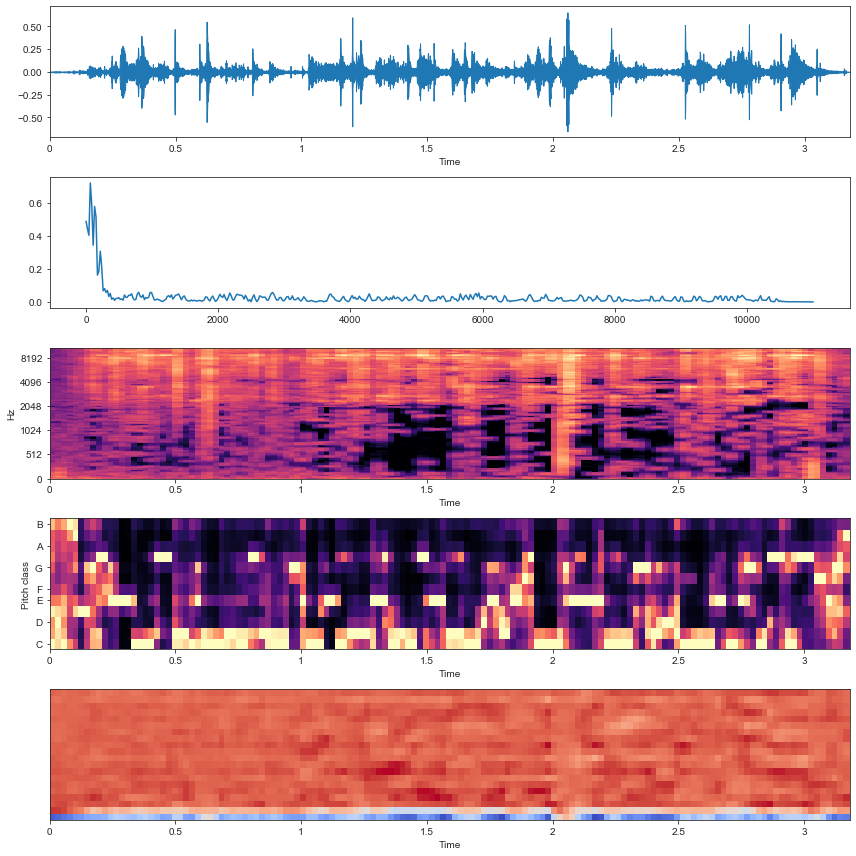

In [16]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(12, 12))
#plt.figure(figsize=(5, 1))


plt.subplot(5, 1, 1)
librosa.display.waveplot(y, sr)
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 2)
plot_dft(y[sr*0:])
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 3)
plot_mel_specgtrogram(y[:sr*10])
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 4)
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')


plt.subplot(5, 1, 5)
mfccs = librosa.feature.mfcc(y=y, sr=sr)
librosa.display.specshow(mfccs, x_axis='time');


plt.tight_layout()

In [25]:
# Fireworks detected as keys
y, sr = librosa.core.load('/media/bita/Elements/Ironhack-Final/Audios/genres/Fireworks/Fireworks.0e9cb14e.wav')
Audio(data=y, rate=sr)

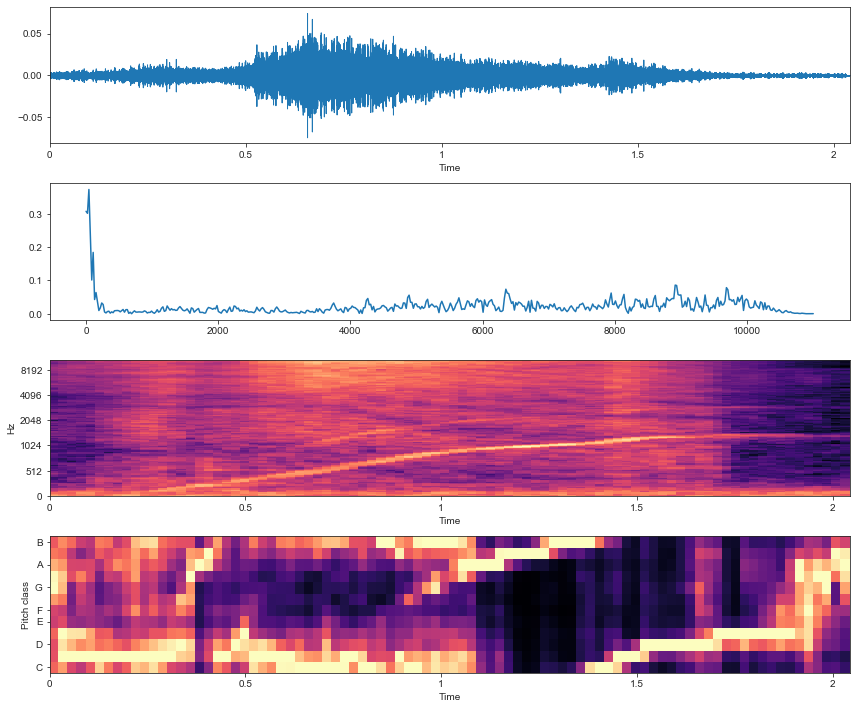

In [26]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(12, 12))
#plt.figure(figsize=(5, 1))


plt.subplot(5, 1, 1)
librosa.display.waveplot(y, sr)
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 2)
plot_dft(y[sr*0:])
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 3)
plot_mel_specgtrogram(y[:sr*10])
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 4)
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')


plt.tight_layout()

In [27]:
# Fireworks detected as keys
y, sr = librosa.core.load('/media/bita/Elements/Ironhack-Final/Audios/genres/Fireworks/Fireworks.256ce8b0.wav')
Audio(data=y, rate=sr)

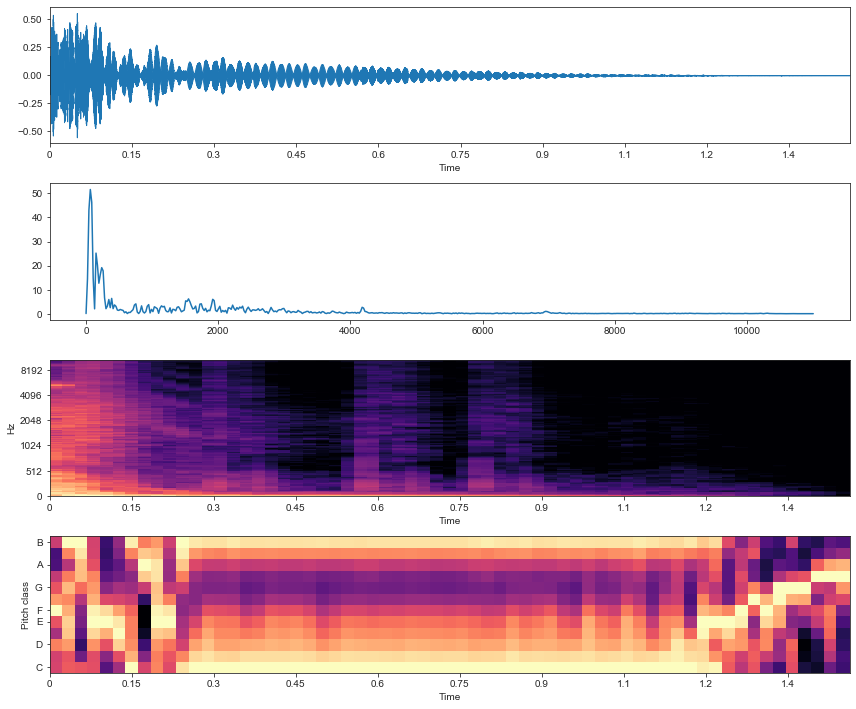

In [28]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(12, 12))
#plt.figure(figsize=(5, 1))


plt.subplot(5, 1, 1)
librosa.display.waveplot(y, sr)
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 2)
plot_dft(y[sr*0:])
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 3)
plot_mel_specgtrogram(y[:sr*10])
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 4)
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')


plt.tight_layout()

In [29]:
# Fireworks detected as Fireworks
y, sr = librosa.core.load('/media/bita/Elements/Ironhack-Final/Audios/genres/Fireworks/Fireworks.643e4e39.wav')
Audio(data=y, rate=sr)

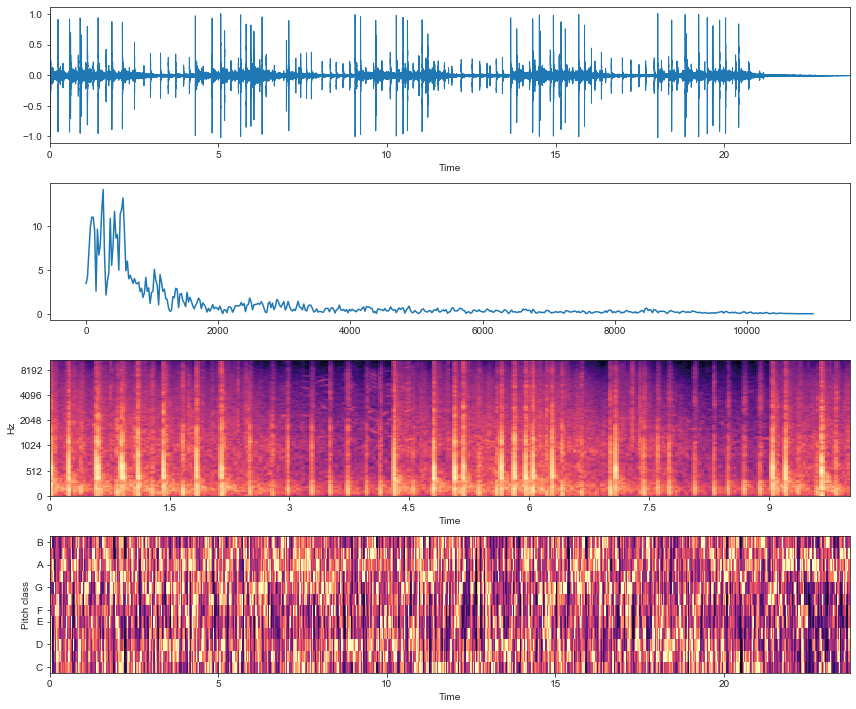

In [30]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(12, 12))
#plt.figure(figsize=(5, 1))


plt.subplot(5, 1, 1)
librosa.display.waveplot(y, sr)
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 2)
plot_dft(y[sr*0:])
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 3)
plot_mel_specgtrogram(y[:sr*10])
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 4)
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')


plt.tight_layout()

In [31]:
#Keys detected as keys
y, sr = librosa.core.load('/media/bita/Elements/Ironhack-Final/Audios/genres/Keys/Keys.96a05522.wav')
Audio(data=y, rate=sr)

In [32]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(12, 12))
#plt.figure(figsize=(5, 1))


plt.subplot(5, 1, 1)
librosa.display.waveplot(y, sr)
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 2)
plot_dft(y[sr*0:])
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 3)
plot_mel_specgtrogram(y[:sr*10])
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 4)
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')


plt.tight_layout()